# Digital image processing in Python 3 - part II: pseudo colors and histograms

## Preparations

### Necessary modules

In [1]:
%matplotlib inline
import numpy as np                #working with arrays
import matplotlib.pyplot as plt   #plot an image
import matplotlib.image as mpimg

## A picture to work with

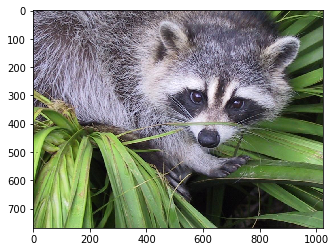

In [2]:
from scipy import misc

racoon = misc.face()

plt.imshow(racoon)
plt.show()

### The grayscale version

First opportunity: Convert picture to grayscale

from skimage.color import rgb2gray
gray_racoon = rgb2gray(racoon)

Other opportunity: directly import the picture as grayscale

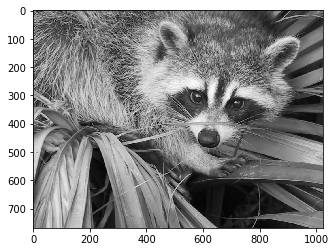

In [3]:
gray = misc.face(gray = True)

plt.imshow(gray, norm=None, cmap = plt.get_cmap('gray'))
plt.show()

What does "rgb2gray"? <br>
$gray\: value = weight\: red\cdot red + weight\: green\cdot green + weight\: blue\cdot blue$ <br> <br>
$\rightarrow $ weights for the colors with <br> $\qquad weight\: red + weight\: green + weight\: blue = 1 $ <br>
$\rightarrow $ There are different values for those weights. Wikipedia (https://de.wikipedia.org/wiki/Grauwert) gives: <br>
$ \qquad weight\: red = 0.299 $<br>
$ \qquad weight\: green = 0.587 $<br>
$ \qquad weight\: blue = 0.114 $<br>

## Histograms of both pictures

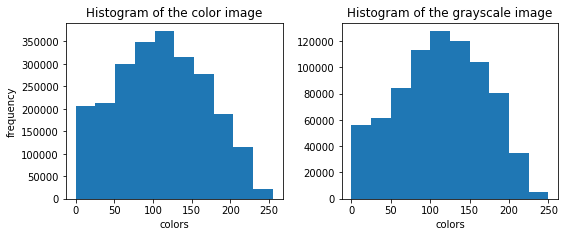

In [4]:
flatracoon = racoon.flatten() #flatten() transforms an array of multi dimensions into 1D
flatgray = gray.flatten()

fig = plt.figure(figsize = (8,6))
sub1 = fig.add_subplot(2,2,1)
sub1.hist(flatracoon)
sub1.set_title('Histogram of the color image')
sub1.set_xlabel('colors')
sub1.set_ylabel('frequency')
sub2 = fig.add_subplot(2,2,2)
sub2.hist(flatgray)
sub2.set_title('Histogram of the grayscale image')
sub2.set_xlabel('colors')
plt.tight_layout()

## Pseudo colors

$\rightarrow $ used to show special aspects of a picture

### Color layers

$\rightarrow $ easiest way of creating pseudo colors: plot every color layer separately (see below)

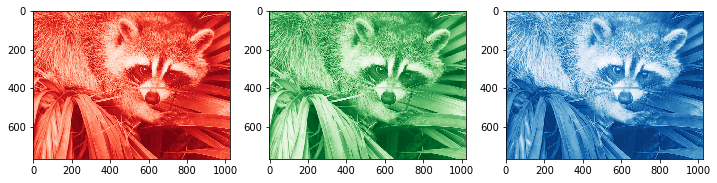

In [5]:
layer0_img = racoon[:,:,0]
layer1_img = racoon[:,:,1]
layer2_img = racoon[:,:,2]

cmap_red = plt.get_cmap('Reds')
cmap_red_rev = cmap_red.reversed()
cmap_green = plt.get_cmap('Greens')
cmap_green_rev = cmap_green.reversed()
cmap_blue = plt.get_cmap('Blues')
cmap_blue_rev = cmap_blue.reversed()

fig = plt.figure(figsize=(12,12))
sub1 = plt.subplot(3, 3, 1)
sub1.imshow(layer0_img, cmap = cmap_red_rev)
sub2 = plt.subplot(3, 3, 2)
sub2.imshow(layer1_img, cmap = cmap_green_rev)
sub3 = plt.subplot(3, 3, 3)
sub3.imshow(layer2_img, cmap = cmap_blue_rev)

$\rightarrow $ color maps are now representing the real meaning of each color

### Other color maps

$\rightarrow $ take one of the color layers, show in different color maps

Text(0.5, 1.0, 'cmap: PiYG')

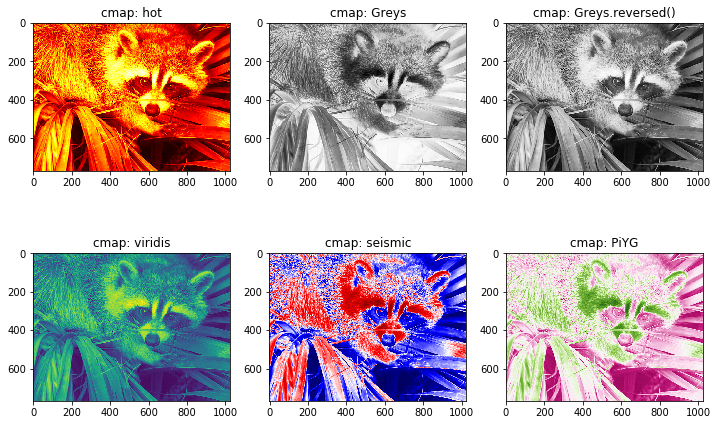

In [6]:
cmap_greys = plt.get_cmap('Greys')
cmap_greys_rev = cmap_greys.reversed()

fig = plt.figure(figsize=(12,12))
sub1 = plt.subplot(3, 3, 1)
sub1.imshow(layer0_img, cmap = "hot")
sub1.set_title("cmap: hot")
sub2 = plt.subplot(3, 3, 2)
sub2.imshow(layer0_img, cmap = cmap_greys)
sub2.set_title("cmap: Greys")
sub3 = plt.subplot(3, 3, 3)
sub3.imshow(layer0_img, cmap = cmap_greys_rev)
sub3.set_title("cmap: Greys.reversed()")
sub4 = plt.subplot(3, 3, 4)
sub4.imshow(layer0_img, cmap = "viridis")
sub4.set_title("cmap: viridis")
sub5 = plt.subplot(3, 3, 5)
sub5.imshow(layer0_img, cmap = "seismic")
sub5.set_title("cmap: seismic")
sub6 = plt.subplot(3, 3, 6)
sub6.imshow(layer0_img, cmap = "PiYG")
sub6.set_title("cmap: PiYG")

## Histogram modification

literature for this chapter: Gonzalez, Woods: Digital Image Processing. Third Edition. PHI Learning Private Limited. New Delhi, 2008

### A random histogram using normal distribution

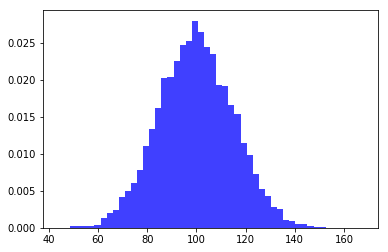

In [7]:
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

plt.figure()
plt.hist(x, 50, density=1, facecolor='blue', alpha=0.75)
plt.show()

$\rightarrow $ count numbers ( = color values in our case) in every interval

### Histogram equalization

Histogram equalization is a method of contrast adjustment. We take all colors that are already contained in the picture and distribute them equally. We don't loose colors, we just change them. It is a common method for increasing contrast in a whole image.

formula for histogram equalization:

$s_{k} = (L - 1)\sum_{j=0}^{k} p_{r}r_{j} = \dfrac{L - 1}{MN}\sum_{j=0}^{k}n_{j}$

What do the variables mean? <br>

| variable | meaning                                |
|----------|----------------------------------------|
| $s_{k}$  | the new color value                    |
| $L$      | amount of occurring colors             |
| $p_{r}$  | their probability of occurrence        |
| $r_{j}$  | a single color                         |
| $M$      | picture's row dimension                |
| $N$      | picture's column dimension             |
| $n_{i}$  | total count of pixels of one color     |

source for formula: Gonzalez, Woods: Digital Image Processing. Third Edition. PHI Learning Private Limited. New Delhi 2008, page 126

In [8]:
def equalhist(pict):

    '''does a histogram equalization

    Parameters
    ----------
    pict : 2D array of numbers
       an image of grayscale values

    equalpict : 2D array of numbers
       the (empty) picture to write in

    Returns
    -------
    2D array
       the modified grayscale image
    '''
    
    equalpict = pict.copy()
    equalpict.fill(255)
    flat = pict.flatten()
    hist = np.histogram(flat, bins=256, density=False)[0]
    x,y = np.shape(pict)
    probs = hist / (x*y) 
    factors = probs
    s = 0
    i = 0
    for elem in probs:
        s += 255*elem
        factors[i] = int(s+0.5) # round
        i += 1

    for i in range(0,x):
            for j in range(0,y):
                value = int(pict[i][j]+0.5)
                new_value = factors[value]
                equalpict[i][j] = new_value
    return equalpict

Text(0.5, 0, 'colors')

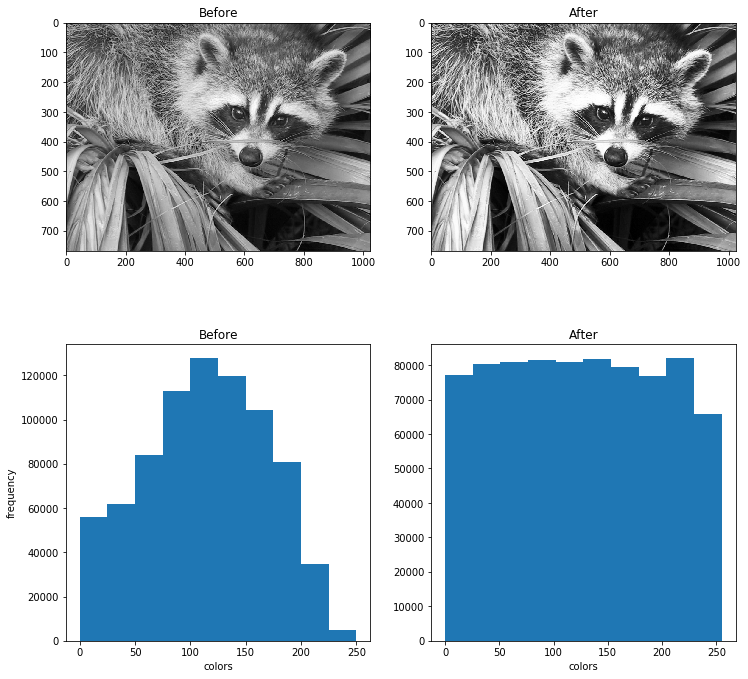

In [9]:
gray_equal = equalhist(gray)
flatgray = gray.flatten()
flatequal = gray_equal.flatten()

                
fig = plt.figure(figsize=(12,12))
sub1 = plt.subplot(2, 2, 1)
sub1.imshow(gray, cmap = plt.get_cmap('gray'))
sub1.set_title("Before")
sub2 = plt.subplot(2, 2, 2)
sub2.imshow(gray_equal, cmap = plt.get_cmap('gray'))
sub2.set_title("After")
sub3 = fig.add_subplot(2,2,3)
sub3.hist(flatgray)
sub3.set_title('Before')
sub3.set_xlabel('colors')
sub3.set_ylabel('frequency')
sub4 = fig.add_subplot(2,2,4)
sub4.hist(flatequal)
sub4.set_title('After')
sub4.set_xlabel('colors')


## Histogram spreading

Histogram spreading is another method for increasing contrast. Here we define an interval of colors and spread them up into the whole grayscale values from zero to two hundred fifty five. Within this method we don't change any possibility for a color occurring, we just shift the color values.

In [10]:
def spreadhist(pict, flat, vmax = 255, vmin = 0):

    '''does a histogram spreading

    Parameters
    ----------   
    pict : 2D array of numbers
        an image of grayscale values

    flat : 1D array of numbers
        the one dimensional variant of the picture

    vmax : number
        the future maximum color value

    vmin : number
        the future minimum color value
 
    Returns
    -------
    2D array
        the modified grayscale image
    '''
    
    min_color = min(flat)
    max_color = max(flat)
    diff_old = max_color - min_color
    diff_new = vmax - vmin
    factor = diff_new / diff_old
    x,y = np.shape(pict)
    for i in range(0,x):
        for j in range(0,y):
            diff = pict[i][j] - min_color
            pict[i][j] = diff * factor
    return pict

In [11]:
gray_spread = spreadhist(gray, flatgray)
flatspread = gray_spread.flatten()

Text(0.5, 0, 'colors')

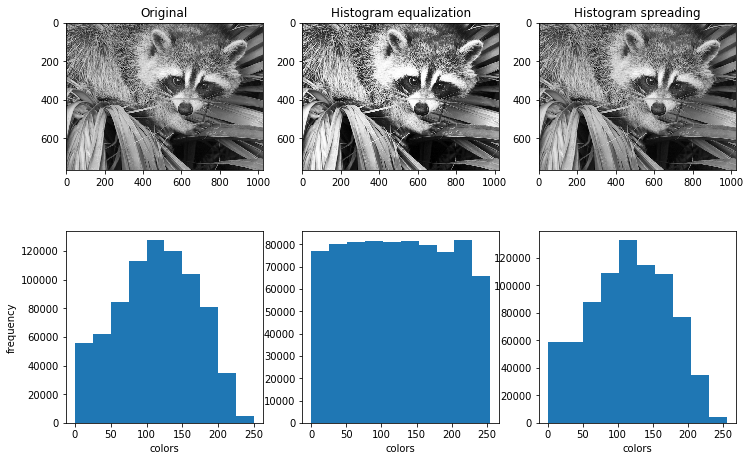

In [12]:
cmap = plt.get_cmap('gray')

fig = plt.figure(figsize=(12,12))
sub1 = plt.subplot(3, 3, 1)
sub1.imshow(gray, cmap = plt.get_cmap('gray'))
sub1.set_title("Original")
sub2 = plt.subplot(3, 3, 2)
sub2.imshow(gray_equal, cmap = plt.get_cmap('gray'))
sub2.set_title("Histogram equalization")
sub3 = plt.subplot(3, 3, 3)
sub3.imshow(gray_spread, cmap = plt.get_cmap('gray'))
sub3.set_title("Histogram spreading")
sub4 = fig.add_subplot(3,3,4)
sub4.hist(flatgray)
sub4.set_xlabel('colors')
sub4.set_ylabel('frequency')
sub5 = fig.add_subplot(3,3,5)
sub5.hist(flatequal)
sub5.set_xlabel('colors')
sub6 = fig.add_subplot(3,3,6)
sub6.hist(flatspread)
sub6.set_xlabel('colors')

## Other example picture

#### Some colors

In [13]:
gray1         = [100,100,100]
gray2         = [99 ,99 ,99 ]
gray3         = [101,101,101]

Some color lists -> choose one!

In [14]:
colorList_spread = [gray1, gray2, gray3]

colorList = colorList_spread

In [15]:
def rotateList(lst, rot):

    '''Rotates a given list

    Parameters
    ----------
    lst : list
        list with entries of any data type
    rot : integer
        number of entries for the list to be rotated

    Returns
    -------
    list
        the rotated list
    '''
    l2 = lst[rot:] + lst[:rot]
    return l2

In [16]:
#define the picture's side length
pictSize = 120

def drawSquares(colorList, pictSize):

    '''creates a square shaped picture from colored squares

    Parameters
    ----------
    colorList : list
        list of rgb colors to use
    pictSize : integer
        side length of the future picture

    Returns
    -------
    2D array
        the ready and normed kernel
    '''

    pictSize = pictSize//len(colorList)
    squareLen = pictSize
    pictSize *= len(colorList)
    pictarray = np.zeros([pictSize, pictSize, 3], dtype=np.uint8) #3 layers for r,g,b


    lsta = 0
    lstp = squareLen
    for lines in range(0,len(colorList)):
        csta = 0
        cstp = squareLen
        for col in range(0,len(colorList)):
            pictarray[lsta:lstp,csta:cstp] = colorList[col]
            csta += squareLen
            cstp += squareLen
        lsta += squareLen
        lstp += squareLen
        colorList = rotateList(colorList,-2)
    return pictarray

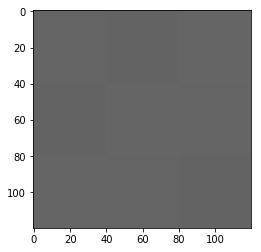

(120, 120, 3)

In [17]:
pictarray = drawSquares(colorList, pictSize)

plt.imshow(pictarray, cmap = plt.get_cmap('gray'))
plt.show()
pictarray.shape

There are 9 squares consisting of 3 different shades of gray. Do you see them?

$\rightarrow $ converting to grayscale (that's, what "skimage.color.rgb2gray" also (nearly) does)

In [18]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [19]:
gray = rgb2gray(pictarray)
flatgray = gray.flatten()
gray_spread = spreadhist(gray, flatgray)
flatspread = gray_spread.flatten()

Text(0.5, 0, 'colors')

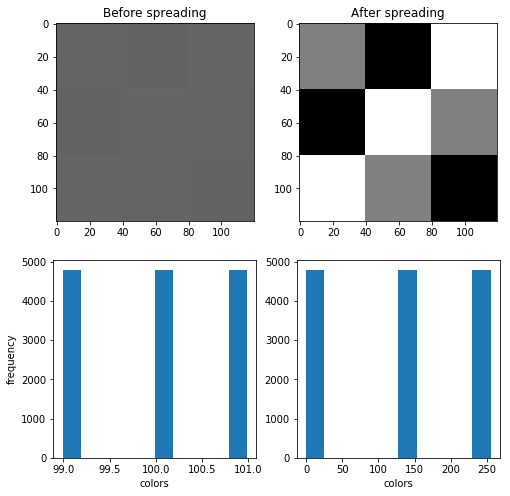

In [20]:
fig = plt.figure(figsize=(8,8))
sub1 = plt.subplot(2, 2, 1)
sub1.imshow(pictarray)
sub1.set_title("Before spreading")
sub2 = plt.subplot(2, 2, 2)
sub2.imshow(gray_spread, cmap = plt.get_cmap('gray'))
sub2.set_title("After spreading")
sub3 = plt.subplot(2, 2, 3)
sub3.hist(flatgray)
#sub3.set_title("Before")
sub3.set_xlabel('colors')
sub3.set_ylabel('frequency')
sub4 = plt.subplot(2, 2, 4)
sub4.hist(flatspread)
#sub4.set_title("After")
sub4.set_xlabel('colors')

$\rightarrow $ no change in occurrence of every color, but change in absolute color values